# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_Train = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_survived=pd.read_csv('gender_submission.csv')

In [3]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
df_survived.drop(['PassengerId'],axis=1)

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [6]:
df_test['Survived']=df_survived['Survived']

In [7]:
df_survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [9]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df=pd.concat([df_test,df_Train])

In [11]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


# EDA & Data Cleaning:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [13]:
df.corr()['Survived'].sort_values()

Pclass        -0.264710
Age           -0.053695
PassengerId   -0.020370
SibSp          0.002370
Parch          0.108919
Fare           0.233622
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

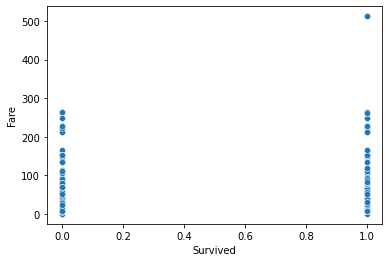

In [14]:
sns.scatterplot(data=df , x='Survived', y='Fare')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

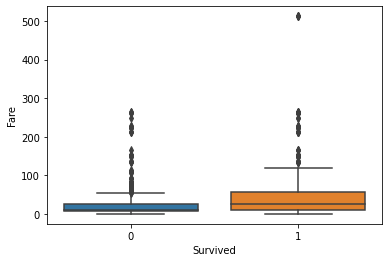

In [15]:
sns.boxplot(data=df , x='Survived', y='Fare')

In [16]:
df[(df['Survived']==1)&(df['Fare']>400)][['Survived','Fare']]

,Survived,Fare
343,1,512.3292
258,1,512.3292
679,1,512.3292
737,1,512.3292


In [17]:
index_drop=df[(df['Fare']>400) & (df['Survived']==1) ].index
df=df.drop(index_drop, axis=0)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

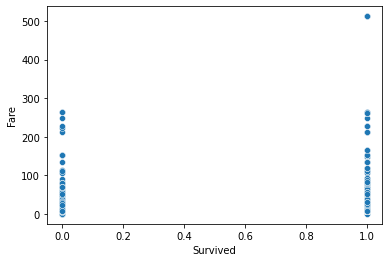

In [18]:
sns.scatterplot(data=df_Train , x='Survived', y='Fare')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

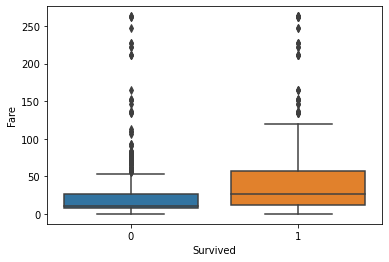

In [19]:
sns.boxplot(data=df , x='Survived', y='Fare')

### Checking for missing data:

In [20]:
df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
Survived       False
dtype: bool

**we have passenger Id so we can drop the names because it can not help us for our model building**

In [21]:
df=df.drop(['Name'],axis=1)

In [22]:
df.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1011
Embarked          2
Survived          0
dtype: int64

In [23]:
100*(df.isnull().sum()/len(df))

PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
Age            20.184190
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076746
Cabin          77.590177
Embarked        0.153492
Survived        0.000000
dtype: float64

In [24]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [25]:
nan_percent= missing_percent(df)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Fare'),
  Text(1, 0, 'Embarked'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Cabin')])

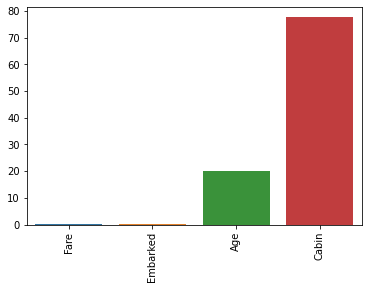

In [26]:
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

(0.0, 1.0)

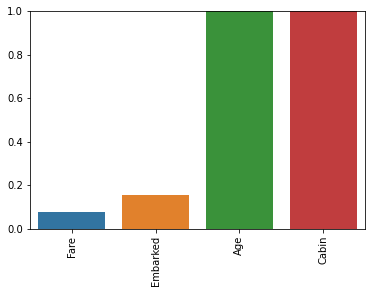

In [27]:
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [28]:
df[df['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
152,1044,3,male,60.5,0,0,3701,NaN,NaN,S,0


In [29]:
df= df.dropna(axis=0, subset=['Fare'])

In [30]:
df[df['Embarked'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
61,62,1,female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,female,62.0,0,0,113572,80.0,B28,NaN,1


In [31]:
df= df.dropna(axis=0, subset=['Embarked'])

(array([0, 1]), [Text(0, 0, 'Age'), Text(1, 0, 'Cabin')])

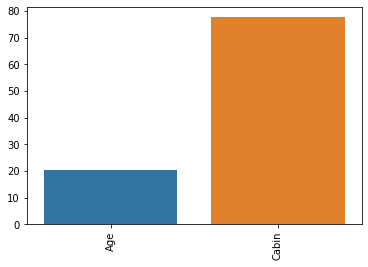

In [32]:
nan_percent= missing_percent(df)
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [33]:
df[df['Age'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
10,902,3,male,NaN,0,0,349220,7.8958,NaN,S,0
22,914,1,female,NaN,0,0,PC 17598,31.6833,NaN,S,1
29,921,3,male,NaN,2,0,2662,21.6792,NaN,C,0
33,925,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
36,928,3,female,NaN,0,0,342712,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
859,860,3,male,NaN,0,0,2629,7.2292,NaN,C,0
863,864,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,0
868,869,3,male,NaN,0,0,345777,9.5000,NaN,S,0
878,879,3,male,NaN,0,0,349217,7.8958,NaN,S,0


<AxesSubplot:xlabel='Age', ylabel='Density'>

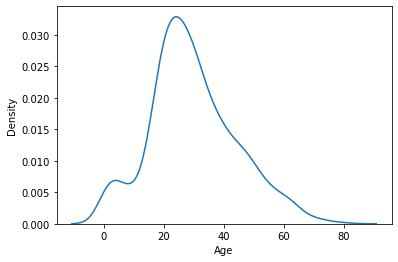

In [34]:
sns.kdeplot(data=df['Age'])

**since missing ages are not neglectable,we replace them with mean.**

In [35]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

missing_percent(df)

Cabin    77.692308
dtype: float64

**we almost don't have any data about Cabin(missing=77%) so we drop it**

In [36]:
df= df.drop(['Cabin'], axis=1)

In [37]:
df.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
Survived       False
dtype: bool

**we don't have any missing value**

**ticket column doesn't help us in model buillding so we drop it**

In [38]:
df=df.drop(['Ticket'],axis=1)

# EDA

In [39]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,1
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,1


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

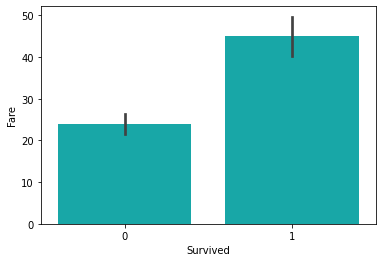

In [40]:
sns.barplot(data=df,x='Survived',y='Fare',color='c')

**the more they paid for Fare the more they survived**

<AxesSubplot:xlabel='Survived', ylabel='Age'>

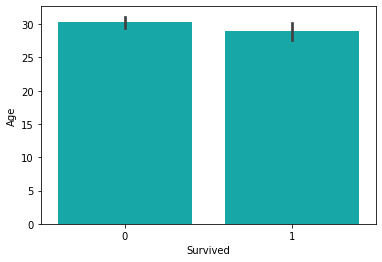

In [41]:
sns.barplot(data=df,x='Survived',y='Age',color='c')

**it seems age didn't affected on this issue**

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

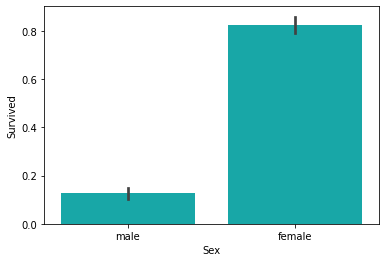

In [42]:
sns.barplot(data=df,y='Survived',x='Sex',color='c')

**most of the survivors were female**

<AxesSubplot:>

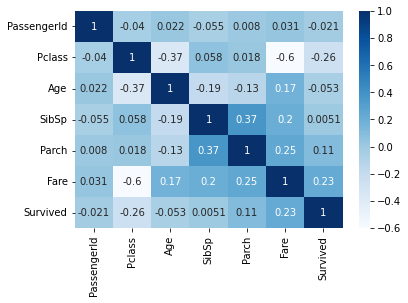

In [43]:
sns.heatmap(data=df.corr(),annot=True,cmap="Blues")

**Fare value had the most impact on surviving**

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

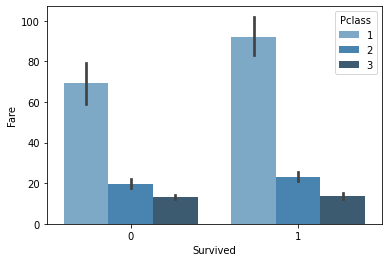

In [44]:
sns.barplot(x="Survived", y="Fare", hue="Pclass", data=df,palette="Blues_d")

**as it shows people with more fare and the high Pclass had more chance to survive**

# dealing with categorical data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1300 non-null   int64  
 1   Pclass       1300 non-null   int64  
 2   Sex          1300 non-null   object 
 3   Age          1300 non-null   float64
 4   SibSp        1300 non-null   int64  
 5   Parch        1300 non-null   int64  
 6   Fare         1300 non-null   float64
 7   Embarked     1300 non-null   object 
 8   Survived     1300 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 133.9+ KB


In [46]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,1
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,1


**"Survived" and "Pclass" are categorical but now they are Int. we have to change them to object**

In [47]:
df['Survived'] = df['Survived'].apply(str)
df['Pclass'] = df['Pclass'].apply(str)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1300 non-null   int64  
 1   Pclass       1300 non-null   object 
 2   Sex          1300 non-null   object 
 3   Age          1300 non-null   float64
 4   SibSp        1300 non-null   int64  
 5   Parch        1300 non-null   int64  
 6   Fare         1300 non-null   float64
 7   Embarked     1300 non-null   object 
 8   Survived     1300 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 133.9+ KB


**Dummy Variables:**

In [49]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [50]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1300 non-null   int64  
 1   Age          1300 non-null   float64
 2   SibSp        1300 non-null   int64  
 3   Parch        1300 non-null   int64  
 4   Fare         1300 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 93.2 KB


In [51]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    1300 non-null   object
 1   Sex       1300 non-null   object
 2   Embarked  1300 non-null   object
 3   Survived  1300 non-null   object
dtypes: object(4)
memory usage: 83.1+ KB


In [52]:
# Converting objects to number by one-hot encoding(drop_first=True:removes multi-collinearity)
df_obj= pd.get_dummies(df_obj, drop_first=True)

In [53]:
Final_df= pd.concat([df_num, df_obj], axis=1)

In [54]:
Final_df.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived_1
0,892,34.5,0,0,7.8292,0,1,1,1,0,0
1,893,47.0,1,0,7.0000,0,1,0,0,1,1
2,894,62.0,0,0,9.6875,1,0,1,1,0,0
3,895,27.0,0,0,8.6625,0,1,1,0,1,0
4,896,22.0,1,1,12.2875,0,1,0,0,1,1


**now the data set is ready**

# Decision Tree

<AxesSubplot:xlabel='Survived_1', ylabel='count'>

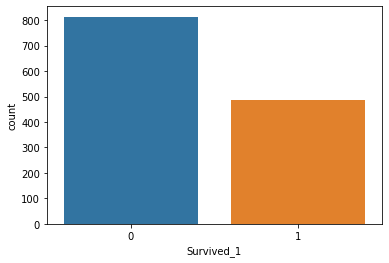

In [55]:
sns.countplot(data=Final_df, x='Survived_1')

the problem is balanced

In [56]:
X= Final_df.drop('Survived_1', axis=1)
y= Final_df['Survived_1']

**Split the Data to Train & Test**

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
model = DecisionTreeClassifier(max_depth=2, random_state=81)

In [61]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=81)

In [62]:
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
cf_matrix = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

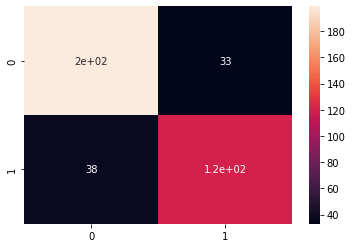

In [65]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       232
           1       0.78      0.76      0.77       158

    accuracy                           0.82       390
   macro avg       0.81      0.81      0.81       390
weighted avg       0.82      0.82      0.82       390



In [67]:
#importance of the features: it shows that which feature was pure to help splitting the data
model.feature_importances_

array([0.03265588, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04325561, 0.92408851, 0.        , 0.        ])

In [68]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
PassengerId,0.032656
Age,0.000000
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Pclass_2,0.000000
Pclass_3,0.043256
Sex_male,0.924089
Embarked_Q,0.000000
Embarked_S,0.000000


**SEX was the purest**

# Visualization

In [69]:
from sklearn.tree import plot_tree
from sklearn import tree

In [71]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       232
           1       0.78      0.76      0.77       158

    accuracy                           0.82       390
   macro avg       0.81      0.81      0.81       390
weighted avg       0.82      0.82      0.82       390





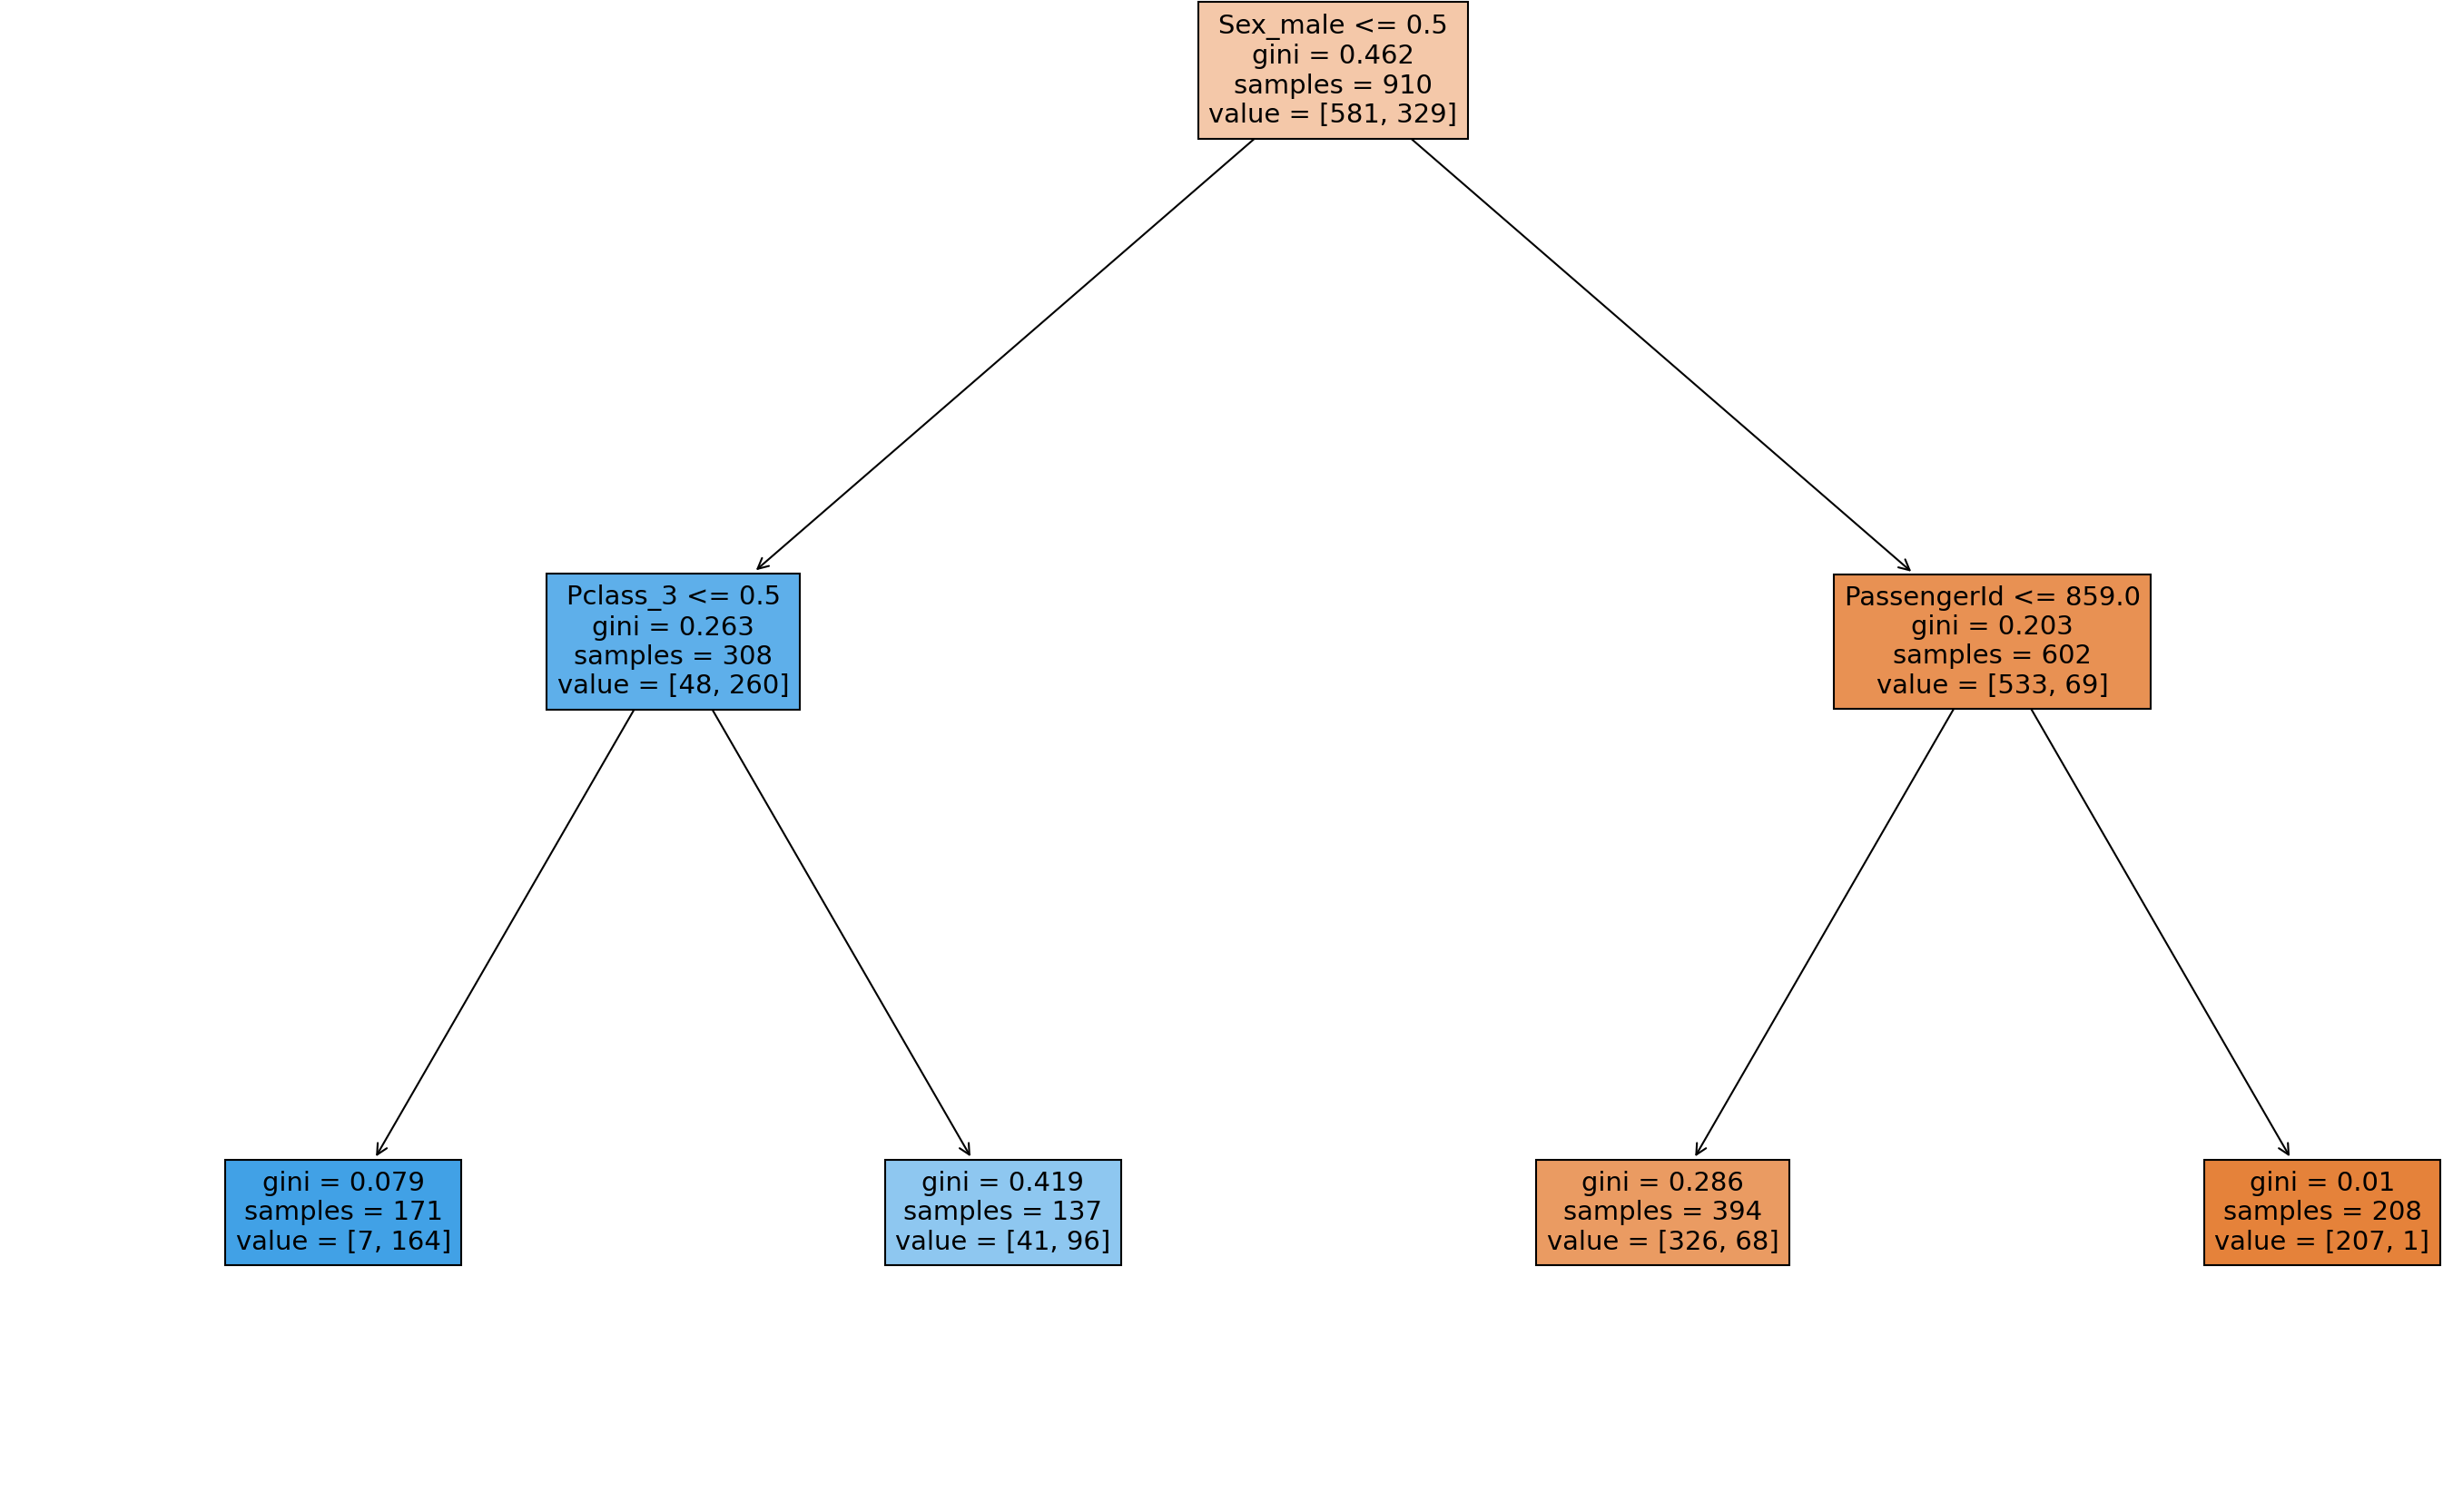

In [72]:
report_model(model)

### hyper parameters

In [73]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

## Max Leaf Nodes

In [74]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       232
           1       0.78      0.76      0.77       158

    accuracy                           0.82       390
   macro avg       0.81      0.81      0.81       390
weighted avg       0.82      0.82      0.82       390





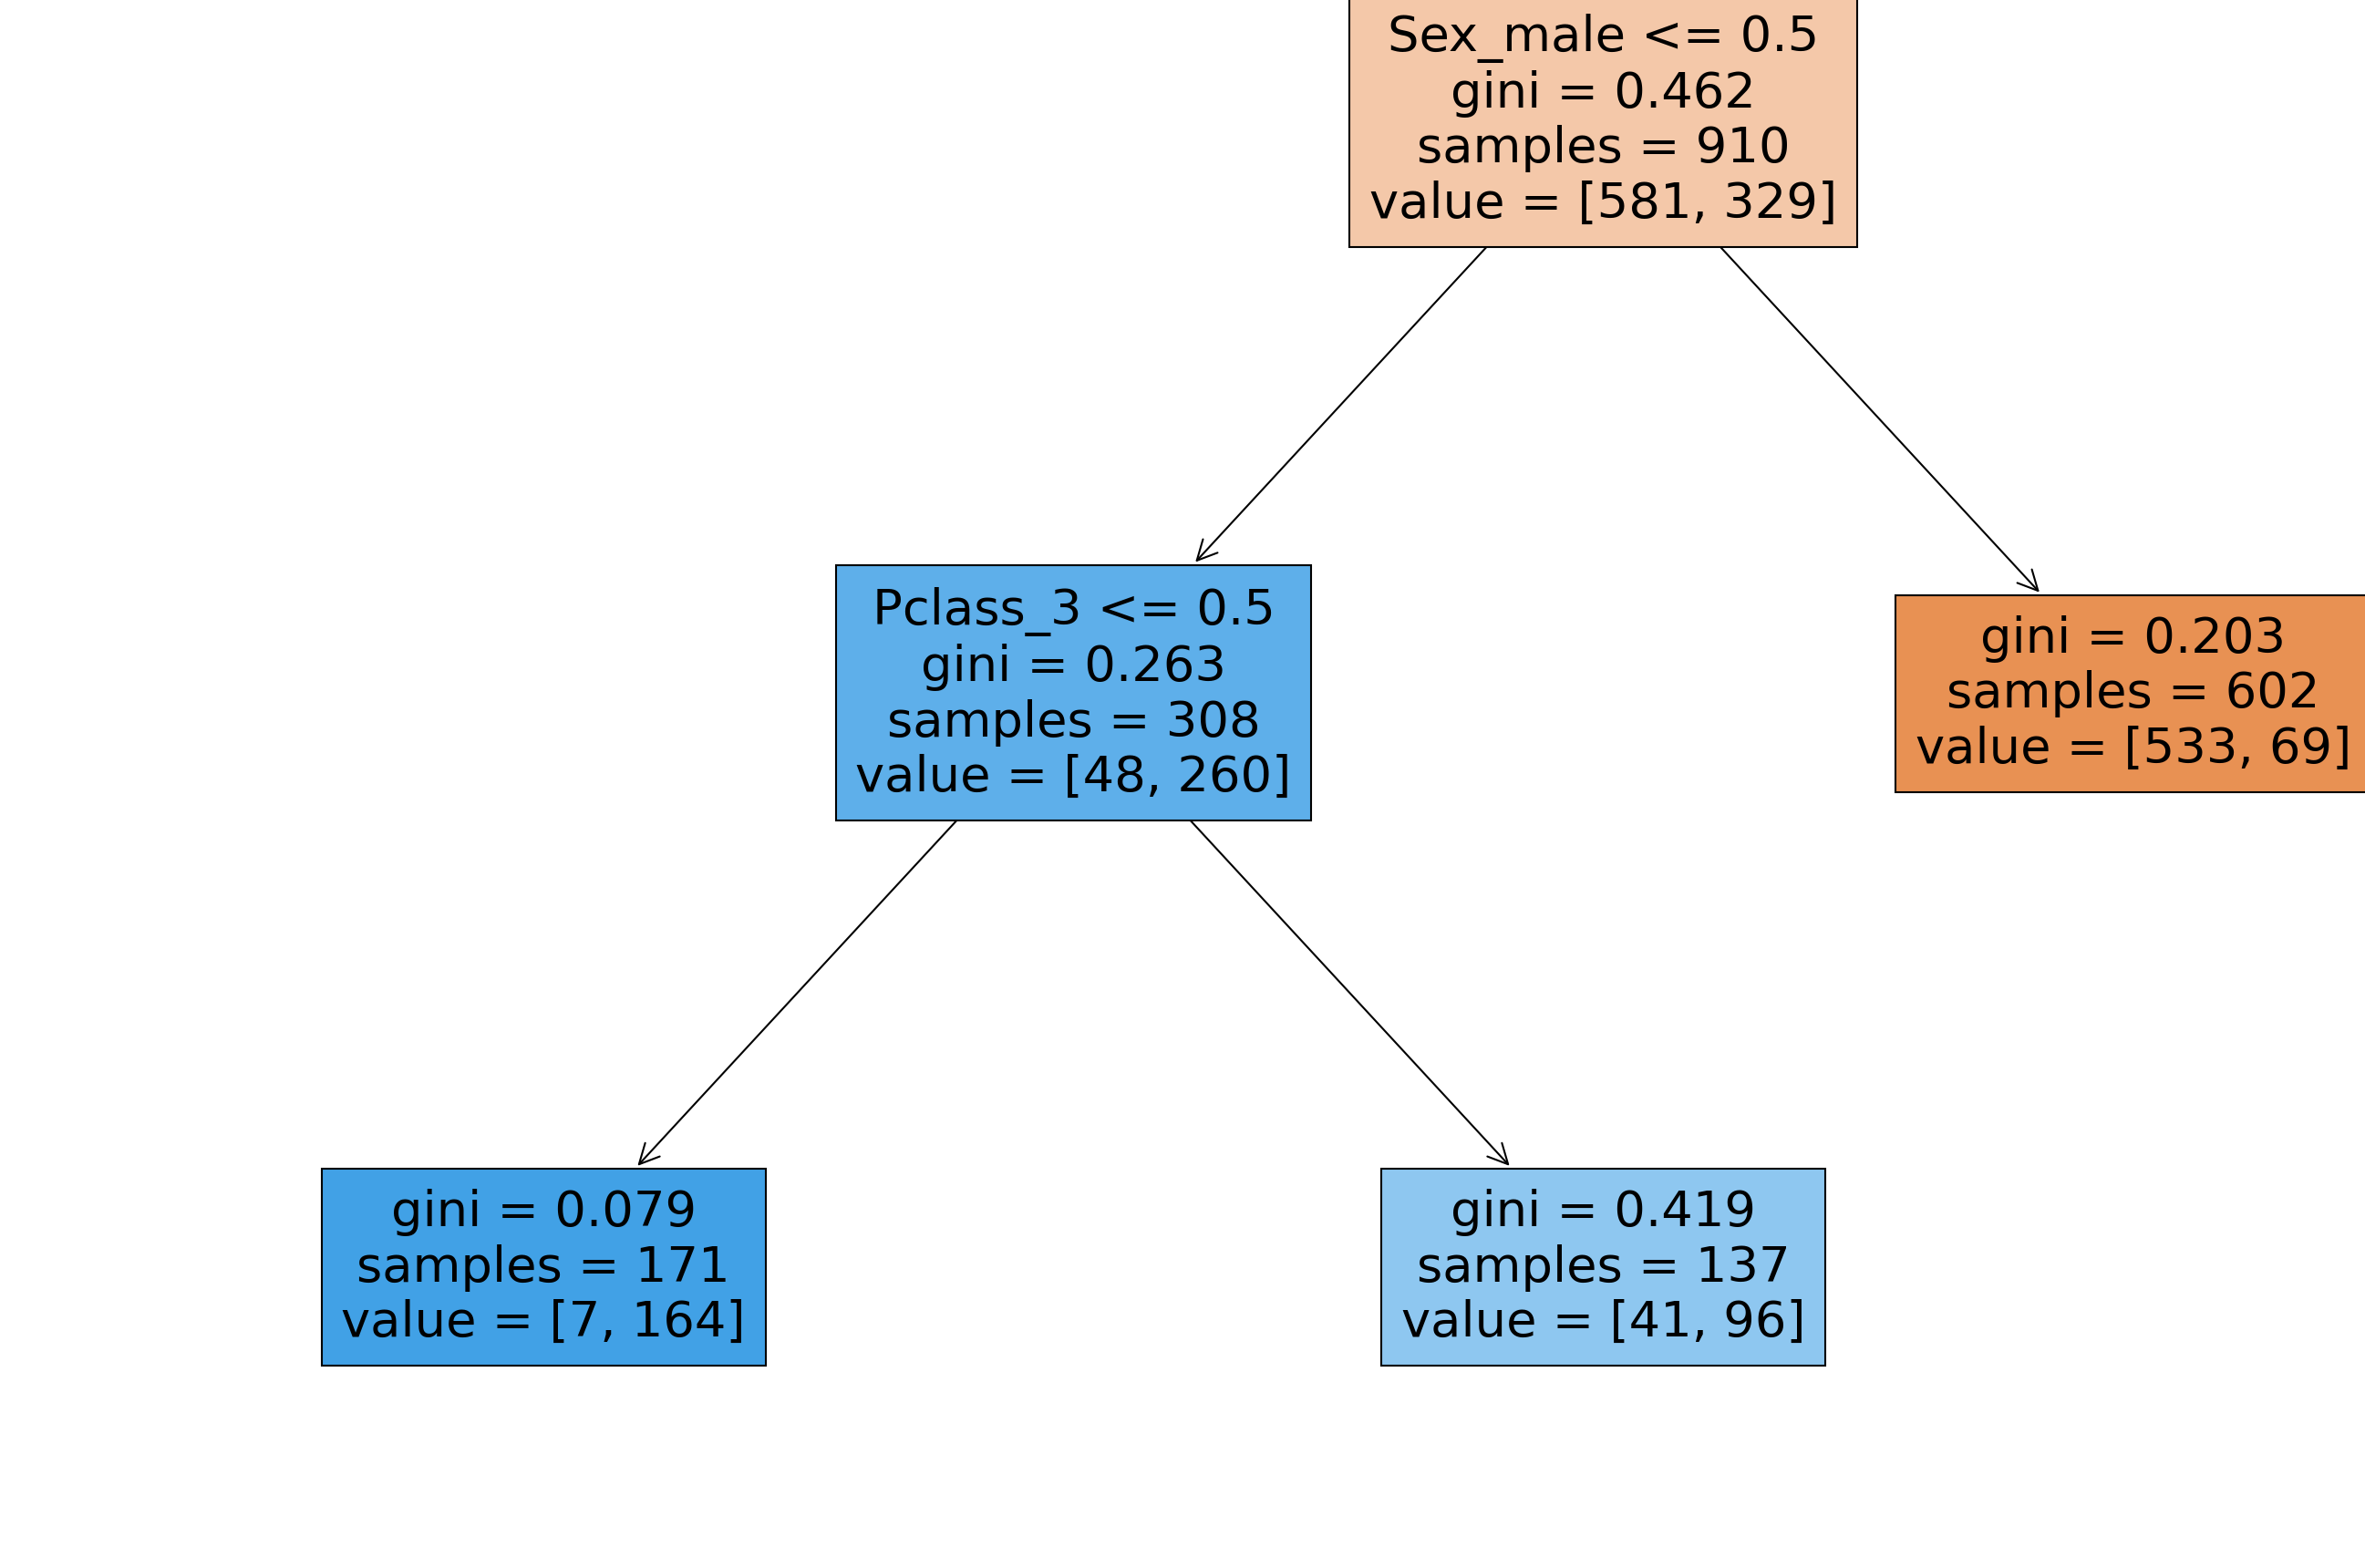

In [75]:
report_model(pruned_tree)

## Kriteria

In [76]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       232
           1       0.76      0.80      0.78       158

    accuracy                           0.82       390
   macro avg       0.81      0.81      0.81       390
weighted avg       0.82      0.82      0.82       390





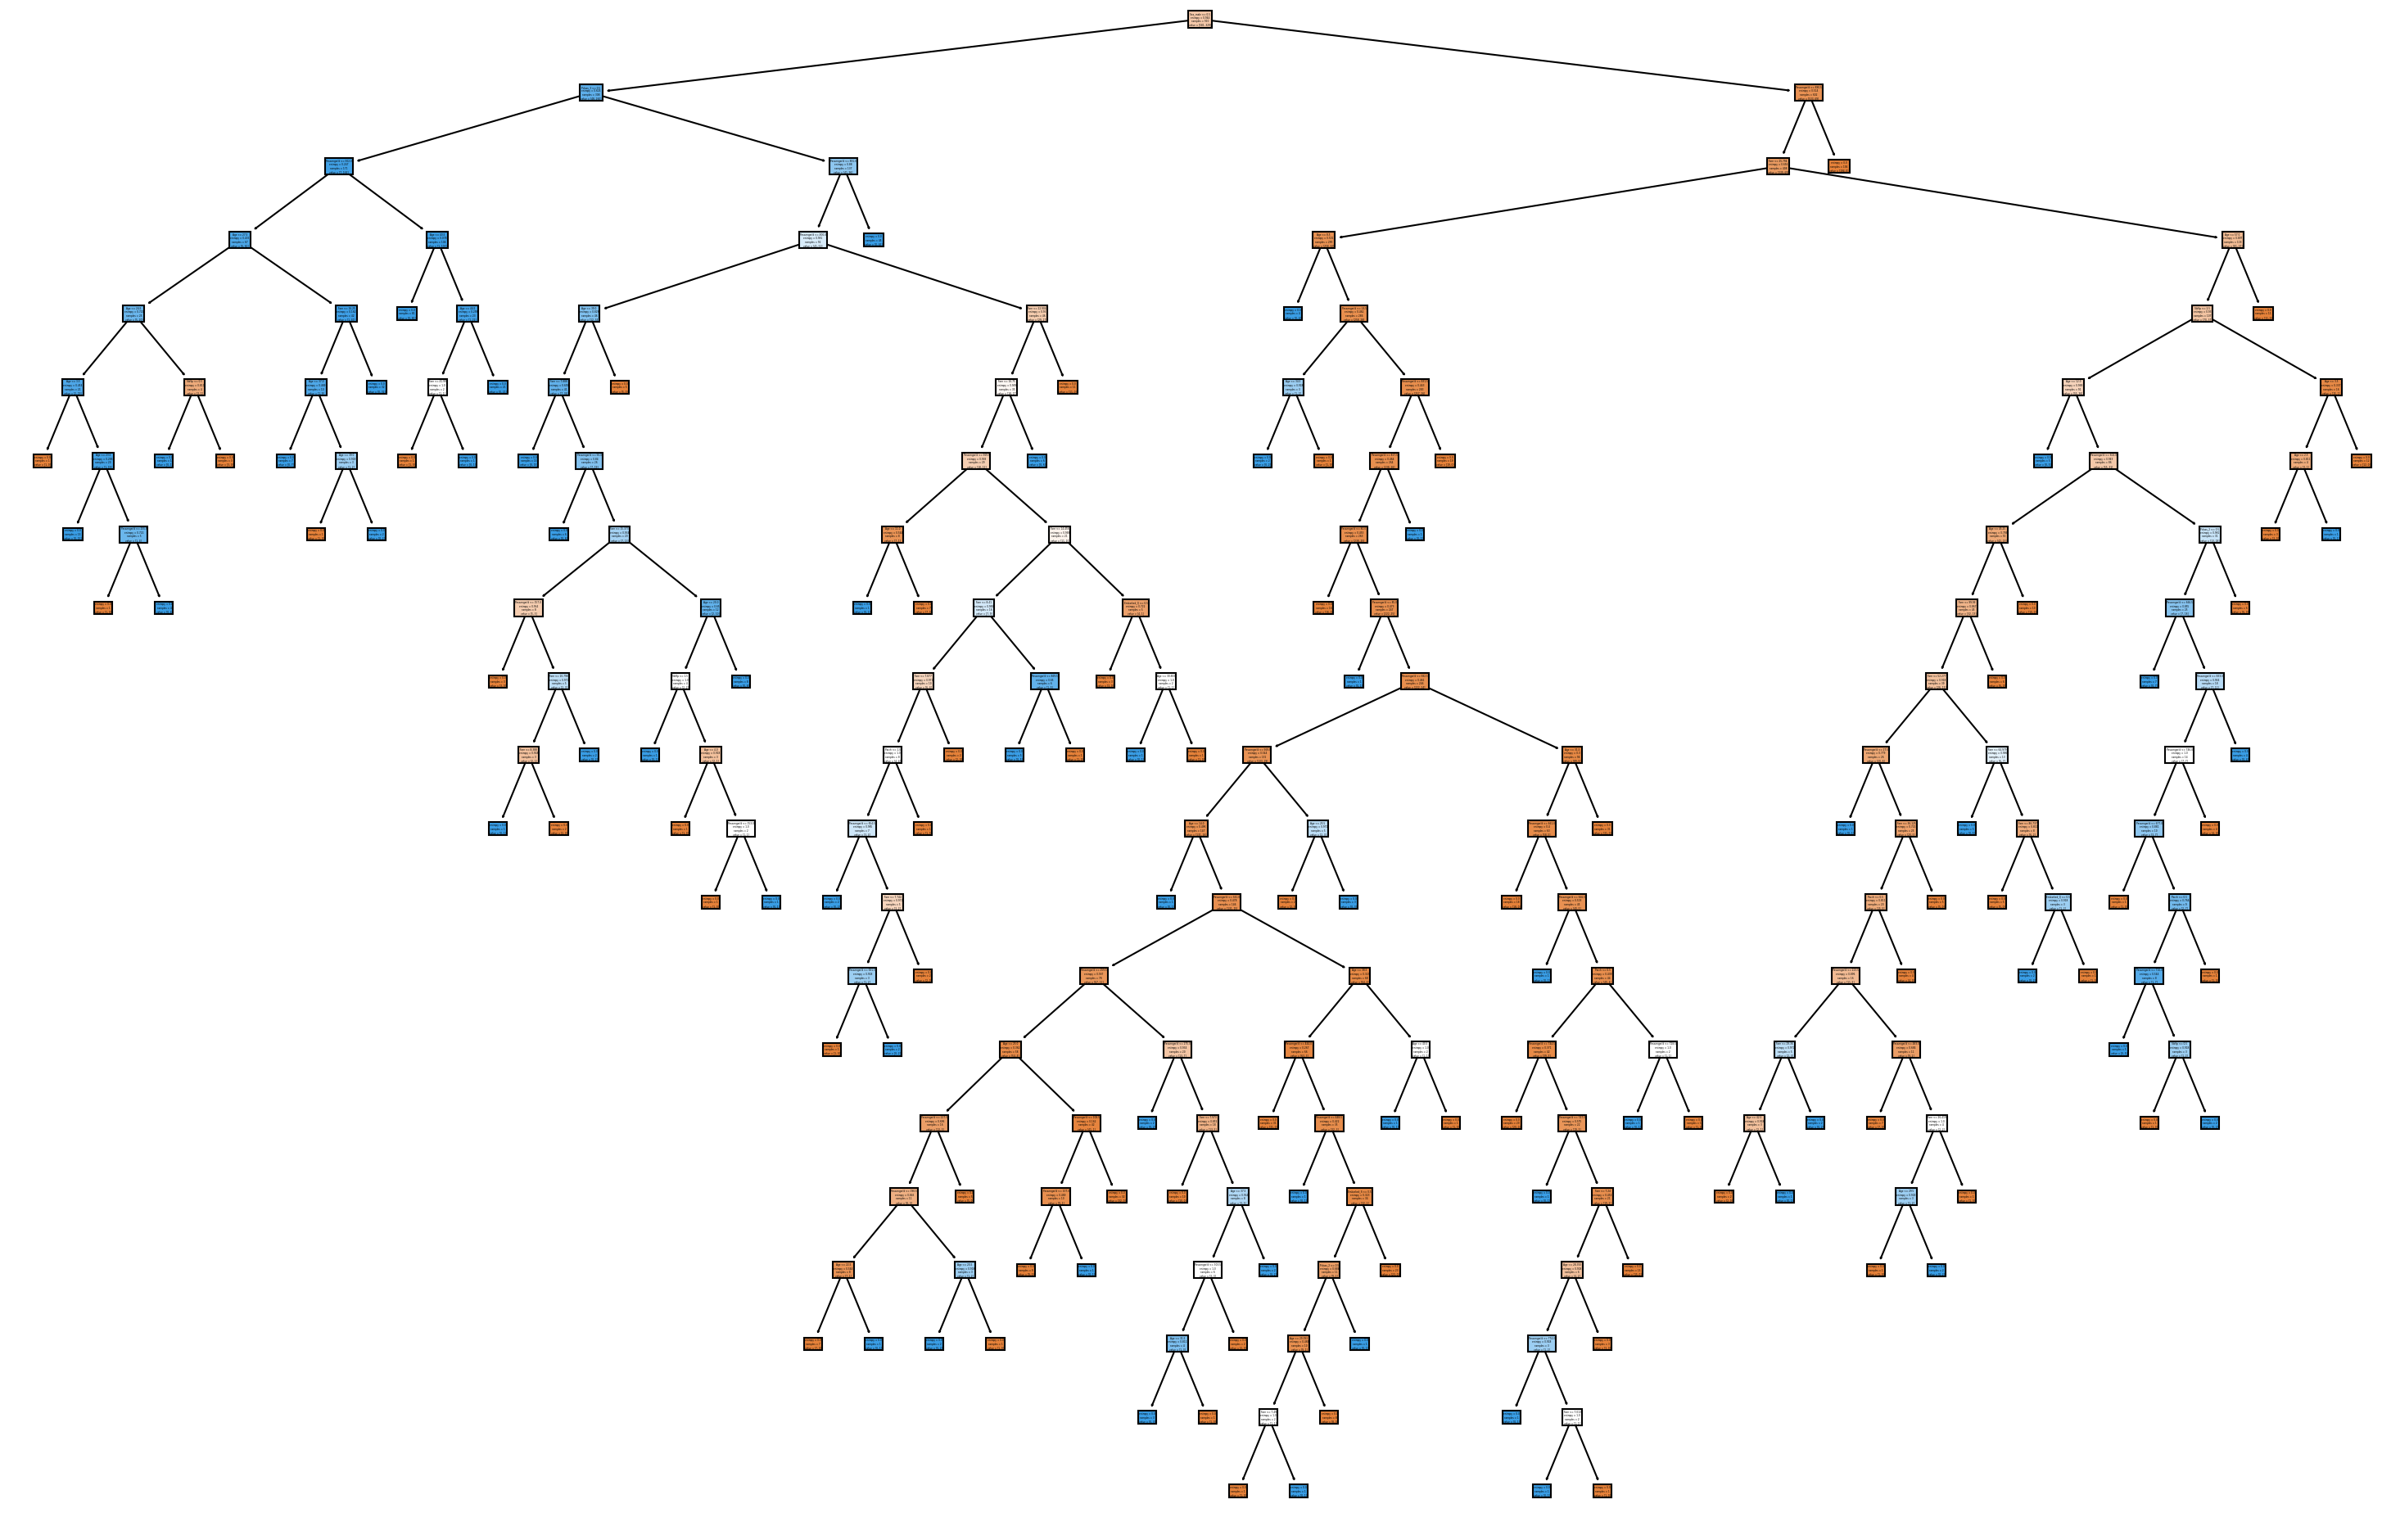

In [77]:
report_model(entropy_tree)